In [6]:
pip install torch torchvision


^C
Note: you may need to restart the kernel to use updated packages.


Pertama, kita perlu mengimpor library yang diperlukan dan mengunduh dataset CIFAR-10.
CIFAR-10 = 60000 gambar berwarna dengan ukuran 32x32 piksel dengan 10 kelas (binatang dan benda).

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 605s 4us/step


Membuat model CNN sederhana dengan beberapa lapisan konvolusi dan pooling.

In [2]:
# Mendefinisikan model CNN
model = Sequential()

# Lapisan konvolusi 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Lapisan konvolusi 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Lapisan konvolusi 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Meratakan/flatten output
model.add(Flatten())

# Lapisan fully connected 1
model.add(Dense(128, activation='relu'))

# Lapisan fully connected 2 (Lapisan output)
model.add(Dense(10, activation='softmax'))


c:\Users\Galih Setiawan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


 Kompilasi model dengan optimizer dan loss function yang sesuai.

In [3]:
# Mengkompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Latih model menggunakan dataset yang telah dipreproses.

In [4]:
# Melatih model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.3066 - loss: 1.8610 - val_accuracy: 0.5213 - val_loss: 1.3316
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 95ms/step - accuracy: 0.5381 - loss: 1.2864 - val_accuracy: 0.5520 - val_loss: 1.2353
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 64ms/step - accuracy: 0.6055 - loss: 1.1105 - val_accuracy: 0.6182 - val_loss: 1.1036
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 51ms/step - accuracy: 0.6503 - loss: 0.9965 - val_accuracy: 0.6632 - val_loss: 0.9739
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.6850 - loss: 0.8986 - val_accuracy: 0.6574 - val_loss: 1.0035
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.7150 - loss: 0.8193 - val_accuracy: 0.6741 - val_loss: 0.9576
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.7377 - loss: 0.7516 - val_accuracy: 0.6918 - val_loss: 0.8913
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 42ms/step - accuracy: 0.7629 - loss: 0.6831 - 

Evaluasi model menggunakan data uji untuk mengukur performa model.

In [5]:
# Mengevaluasi model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.2f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7064 - loss: 0.9121
Test accuracy: 0.71


Visualisasi Akurasi dan Loss Selama Pelatihan

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.8141 - loss: 0.5417 - val_accuracy: 0.7152 - val_loss: 0.8974
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.8255 - loss: 0.5015 - val_accuracy: 0.7188 - val_loss: 0.8954
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.8405 - loss: 0.4550 - val_accuracy: 0.7027 - val_loss: 0.9512
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.8529 - loss: 0.4210 - val_accuracy: 0.7009 - val_loss: 0.9878
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.8664 - loss: 0.3855 - val_accuracy: 0.6984 - val_loss: 1.0322
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.8838 - loss: 0.3373 - val_accuracy: 0.7144 - val_loss: 1.0239
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.8939 - loss: 0.3117 - val_accuracy: 0.7141 - val_loss: 1.0454
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.9040 - loss: 0.2761 - 

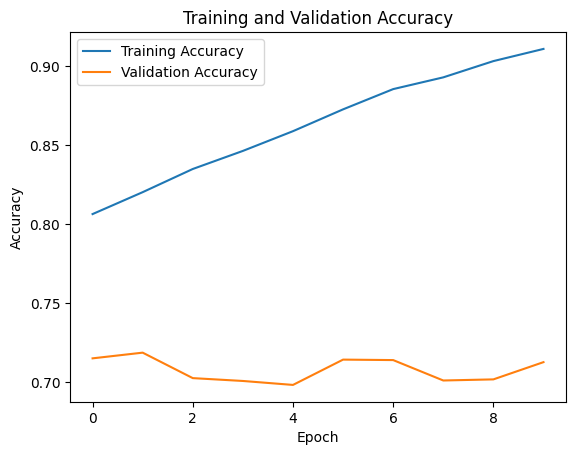

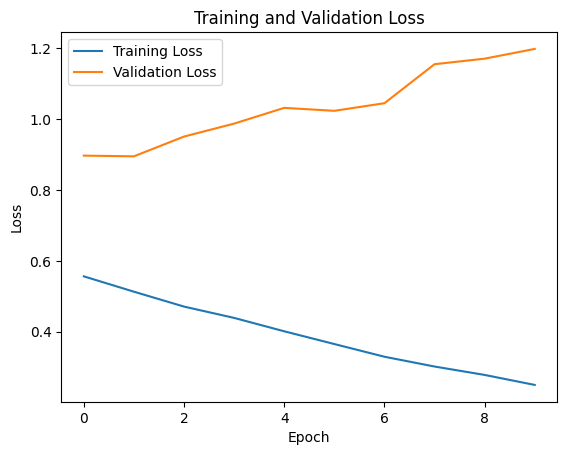

In [6]:
import matplotlib.pyplot as plt

# Simpan history pelatihan
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Plot akurasi training dan validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss training dan validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


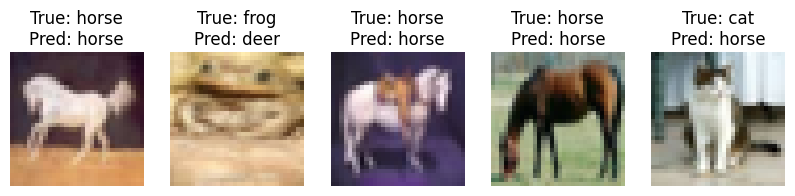

In [7]:
import numpy as np

# Definisikan label dari CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Pilih gambar acak dari data uji
num_images = 5
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)
sample_test_images = test_images[random_indices]
sample_test_labels = test_labels[random_indices]

# Prediksi menggunakan model
predictions = model.predict(sample_test_images)

# Plot hasil prediksi
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(sample_test_images[i])
    plt.title(f"True: {class_names[np.argmax(sample_test_labels[i])]}\nPred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.show()
